# Exploratory Data Analysis

In [1]:
import os
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
pd.set_option('display.max_columns', None)
%matplotlib inline
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

## League Games

In [2]:
LEAGUE_DATAPATH = '/.../data/all_players_league_match_info.csv'
league_data = pd.read_csv(LEAGUE_DATAPATH, parse_dates=['startTimestamp', 'player_birth', 'previous_date'])
matchers = ['form_', 'previous', 'slug', '.id', 'homeTeam', 'awayTeam', 'round']
matching = [s for s in league_data.columns.tolist() if any(xs in s for xs in matchers)]
# print(matching)
new_cols = [col for col in league_data.columns if col not in matching]
league_data = league_data[new_cols]
league_data

,player_name,player_position,player_nationality,player_birth,player_foot,player_height,age,fifa_rating,fifa_potential,after_injury,injury_days,injury_type,rest_days,season,matchid,startTimestamp,tournament.name,current_team,current_team_category,opponent,opponent_category,home_fixture,homeScore.normaltime,awayScore.normaltime,result,Performance
0,Messi,F,ARG,1987-06-24,Left,169,28.18,94,95,0,0,NaN,78.0,15-16,6807357,2015-08-23 16:30:00,LaLiga,Barcelona,1,Athletic Club,0,0,0,1,1,7.8
1,Messi,F,ARG,1987-06-24,Left,169,28.20,94,95,0,0,NaN,6.0,15-16,6807380,2015-08-29 18:30:00,LaLiga,Barcelona,1,Málaga,0,1,1,0,1,9.4
2,Messi,F,ARG,1987-06-24,Left,169,28.24,94,95,0,0,NaN,14.0,15-16,6807400,2015-09-12 18:30:00,LaLiga,Barcelona,1,Atlético Madrid,1,0,1,2,1,8.6
3,Messi,F,ARG,1987-06-24,Left,169,28.26,94,95,0,0,NaN,4.0,15-16,6807468,2015-09-20 18:30:00,LaLiga,Barcelona,1,Levante,0,1,4,1,1,10.0
4,Messi,F,ARG,1987-06-24,Left,169,28.27,94,95,0,0,NaN,3.0,15-16,6807391,2015-09-23 18:00:00,LaLiga,Barcelona,1,Celta Vigo,0,0,4,1,0,9.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5626,Azpilicueta,D,ESP,1989-08-28,Right,178,32.41,83,83,0,0,NaN,3.0,21-22,9576278,2022-01-15 12:30:00,Premier League,Chelsea,1,Manchester City,1,0,1,0,0,7.2
5627,Azpilicueta,D,ESP,1989-08-28,Right,178,32.41,83,83,0,0,NaN,3.0,21-22,9576438,2022-01-18 20:00:00,Premier League,Chelsea,1,Brighton & Hove Albion,0,0,1,1,2,7.2
5628,Azpilicueta,D,ESP,1989-08-28,Right,178,32.43,83,83,0,0,NaN,5.0,21-22,9576334,2022-01-23 16:30:00,Premier League,Chelsea,1,Tottenham,1,1,2,0,1,7.4
5629,Azpilicueta,D,ESP,1989-08-28,Right,178,32.55,83,83,1,7,Knock,16.0,21-22,9576461,2022-03-10 19:30:00,Premier League,Chelsea,1,Norwich City,0,0,1,3,1,6.5


### From Pandas-Profiling Report
2. Position: D=5, F=16, D=1, M=8
3. Player Attributes
4. Rest days(mostly 3)
5. Team name, category(mostly 1) etc
6. Scores, results(mostly wins)


### Performance for some groups

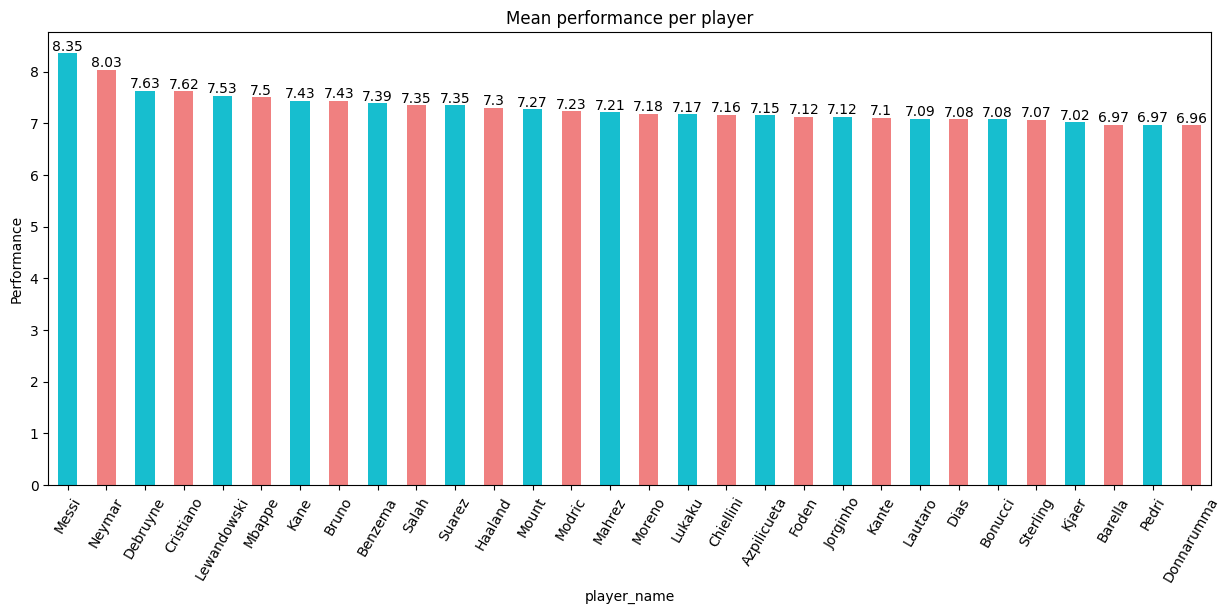

In [3]:
perf_by_player = league_data.groupby(['player_name'])['Performance'].mean().sort_values(ascending=False).round(2)

plt.figure(figsize=(15,6), dpi=100, facecolor='white');
ax = perf_by_player.plot(kind='bar', rot=60, color=['tab:cyan', 'lightcoral']);
for container in ax.containers:
    ax.bar_label(container)
ax.set_ylabel("Performance");
ax.set_title('Mean performance per player');
# ax.figure.savefig('eda/mean_perf_by-player.png');
plt.show();
plt.close();

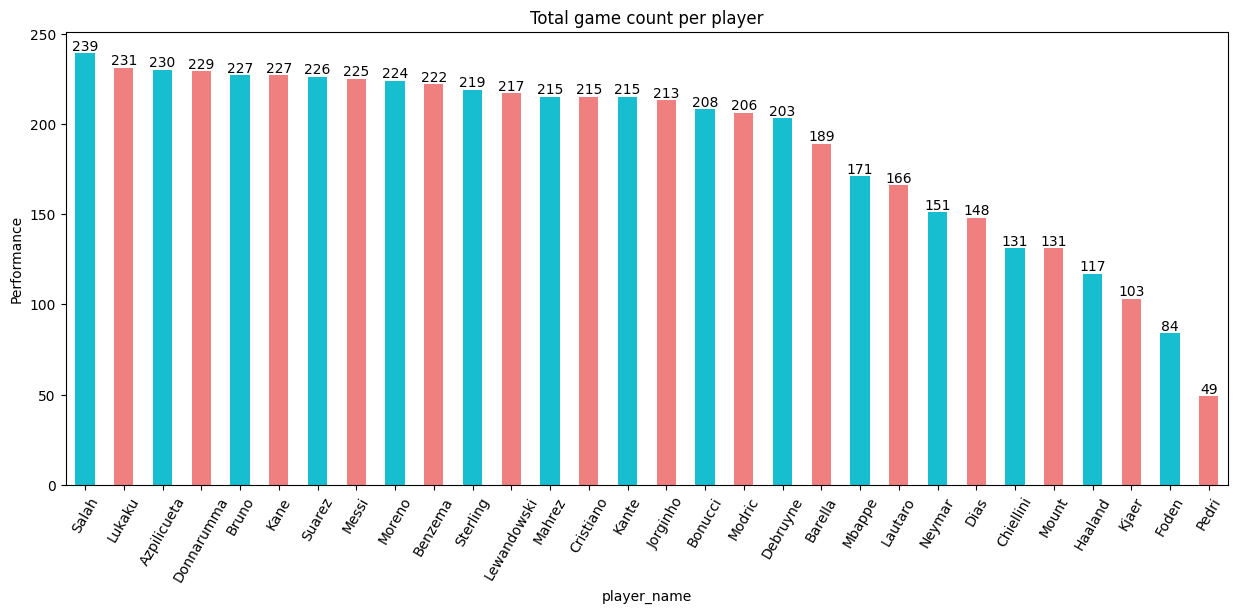

In [4]:
match_counts = league_data.groupby('player_name')['Performance'].count().sort_values(ascending=False)

plt.figure(figsize=(15,6), dpi=100, facecolor='white');
ax = match_counts.plot(kind='bar', rot=60, color=['tab:cyan', 'lightcoral']);
for container in ax.containers:
    ax.bar_label(container)
ax.set_ylabel("Performance");
ax.set_title('Total game count per player');
# ax.figure.savefig('eda/game_count_by-player.png');
plt.show();
plt.close();

In [5]:
# perf_by_position = league_data.groupby(['player_position'])['Performance'].mean().sort_values(ascending=False).round(2)

# plt.figure(figsize=(8,4), dpi=100, facecolor='white');
# ax = perf_by_position.plot(kind='barh', rot=0, color=['deepskyblue', 'chocolate', 'lightgreen', 'indianred']);
# for container in ax.containers:
#     ax.bar_label(container)
# ax.set_ylabel("Performance");
# ax.set_title('Mean performance per position');
# ax.figure.savefig('eda/mean_perf_by-position.png');
# plt.show();
# plt.close();

### Check performance on home/away, or opponent category

In [17]:
# best_home_perf = league_data[league_data['home_fixture']==1].groupby(['player_name'])['Performance'].mean().sort_values(ascending=False).round(2)
# plt.figure(figsize=(15,6), dpi=100, facecolor='white');
# ax = best_home_perf.plot(kind='bar', rot=60, color=['steelblue', 'palevioletred']);
# for container in ax.containers:
#     ax.bar_label(container);
# ax.set_ylabel("Performance");
# ax.set_title('Best performers - home games');
# ax.figure.savefig('eda/best_performers_home.png');
# plt.show();
# plt.close();

# best_away_perf = league_data[league_data['home_fixture']==0].groupby(['player_name'])['Performance'].mean().sort_values(ascending=False).round(2)
# plt.figure(figsize=(15,6), dpi=100, facecolor='white');
# ax = best_away_perf.plot(kind='bar', rot=60, color=['steelblue', 'palevioletred']);
# for container in ax.containers:
#     ax.bar_label(container);
# ax.set_ylabel("Performance");
# ax.set_title('Best performers - away games');
# ax.figure.savefig('eda/best_performers_away.png');
# plt.show();
# plt.close();

In [19]:
# best_performers_top_opponents = league_data[league_data['opponent_category']==1].groupby(['player_name'])['Performance'].mean().sort_values(ascending=False).round(2)
# plt.figure(figsize=(15,6), dpi=100, facecolor='white');
# ax = best_performers_top_opponents.plot(kind='bar', rot=60, color=['seagreen', 'goldenrod']);
# for container in ax.containers:
#     ax.bar_label(container);
# ax.set_ylabel("Performance");
# ax.set_title('Best performers - against top clubs');
# ax.figure.savefig('eda/best_performers_topclubs.png');
# plt.show();
# plt.close();

# best_performers_notop_opponents = league_data[league_data['opponent_category']==0].groupby(['player_name'])['Performance'].mean().sort_values(ascending=False).round(2)
# plt.figure(figsize=(15,6), dpi=100, facecolor='white');
# ax = best_performers_notop_opponents.plot(kind='bar', rot=60, color=['seagreen', 'goldenrod']);
# for container in ax.containers:
#     ax.bar_label(container);
# ax.set_ylabel("Performance");
# ax.set_title('Best performers - against other clubs');
# ax.figure.savefig('eda/best_performers_notopclubs.png');
# plt.show();
# plt.close();

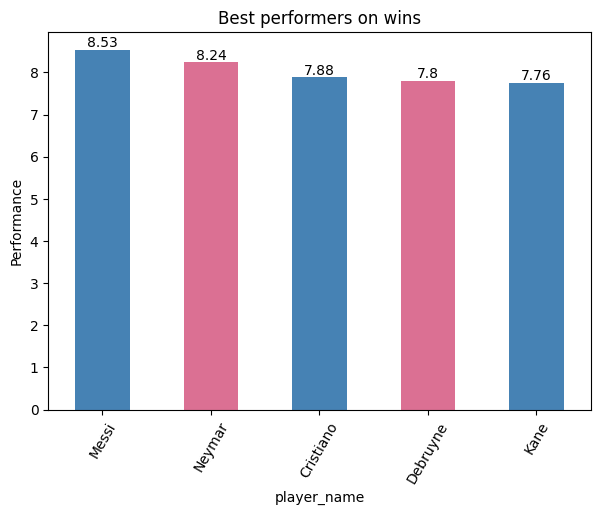

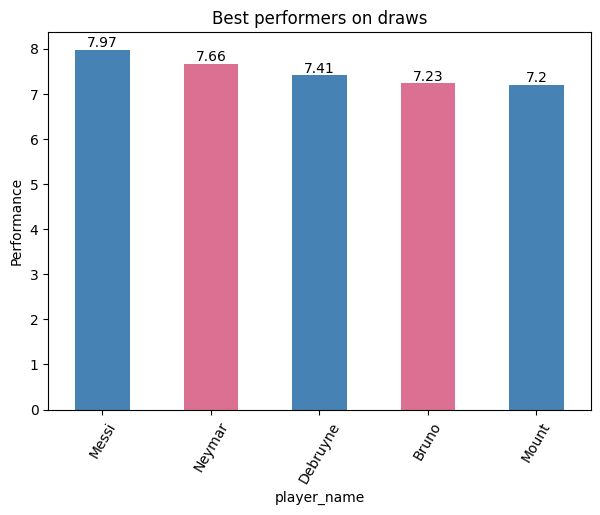

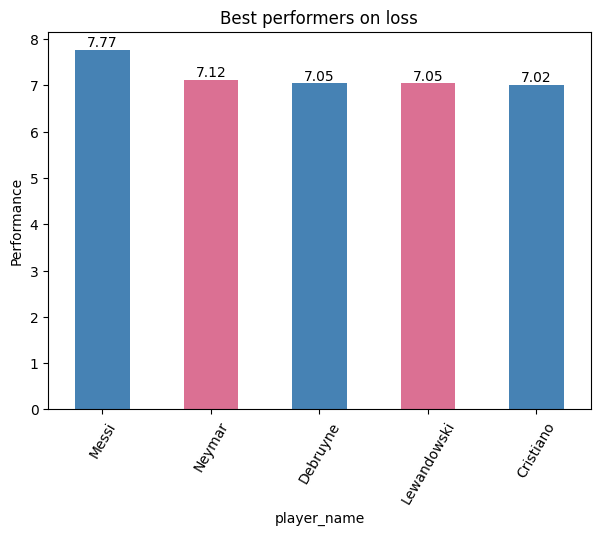

In [20]:
best_performers_win = league_data[league_data['result']==1].groupby(['player_name'])['Performance'].mean().sort_values(ascending=False).round(2).head(5)
plt.figure(figsize=(7,5), dpi=100, facecolor='white');
ax = best_performers_win.plot(kind='bar', rot=60, color=['steelblue', 'palevioletred']);
for container in ax.containers:
    ax.bar_label(container);
ax.set_ylabel("Performance");
ax.set_title('Best performers on wins');
ax.figure.savefig('eda/best_performers_win.png');
plt.show();
plt.close();

best_performers_draw = league_data[league_data['result']==2].groupby(['player_name'])['Performance'].mean().sort_values(ascending=False).round(2).head(5)
plt.figure(figsize=(7,5), dpi=100, facecolor='white');
ax = best_performers_draw.plot(kind='bar', rot=60, color=['steelblue', 'palevioletred']);
for container in ax.containers:
    ax.bar_label(container);
ax.set_ylabel("Performance");
ax.set_title('Best performers on draws');
ax.figure.savefig('eda/best_performers_draw.png');
plt.show();
plt.close();

best_performers_loss = league_data[league_data['result']==0].groupby(['player_name'])['Performance'].mean().sort_values(ascending=False).round(2).head(5)
plt.figure(figsize=(7,5), dpi=100, facecolor='white');
ax = best_performers_loss.plot(kind='bar', rot=60, color=['steelblue', 'palevioletred']);
for container in ax.containers:
    ax.bar_label(container);
ax.set_ylabel("Performance");
ax.set_title('Best performers on loss');
ax.figure.savefig('eda/best_performers_loss.png');
plt.show();
plt.close();

### Scatter plots and heatmap for numerical variables

In [9]:
# sns.lmplot(x="Performance", y="rest_days", data=league_data, fit_reg=False);
# plt.title("Performance and Rest days before match");
# plt.show();

# sns.lmplot(x="Performance", y="age", data=league_data, fit_reg=False);
# plt.title("Performance and Age");
# plt.show();

# sns.lmplot(x="Performance", y="fifa_potential", data=league_data, fit_reg=False);
# plt.title("Performance and fifa potential");
# plt.show();

In [10]:
# #plot the scatter plot of balance and salary variable in data
# # fig = px.scatter(league_data, x='Performance',y='rest_days')
# # fig.show()
# #plot the pair plot of salary, balance and age in data dataframe.
# sns.pairplot(data = league_data, vars=['Performance','rest_days','age', 'fifa_potential']);
# plt.show();
# #plot the correlation matrix.
# sns.heatmap(league_data[['Performance','rest_days','age', 'fifa_potential']].corr(), annot=True, cmap = 'Reds');
# plt.show();


### Box plots for categorical variables

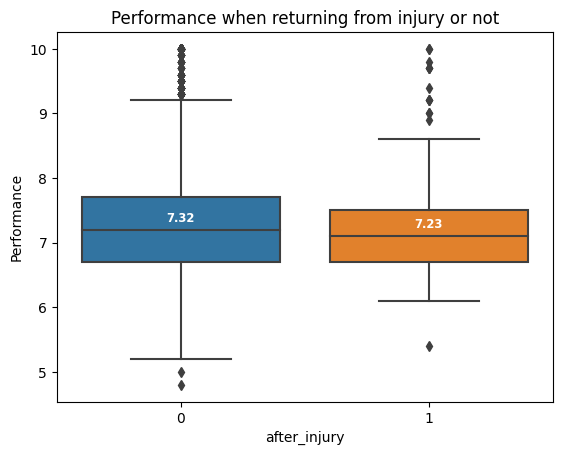

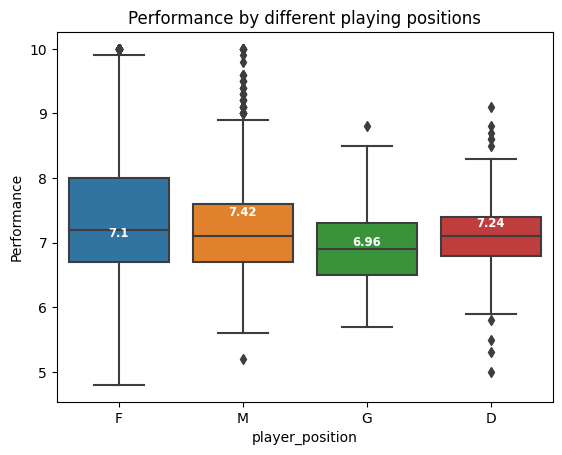

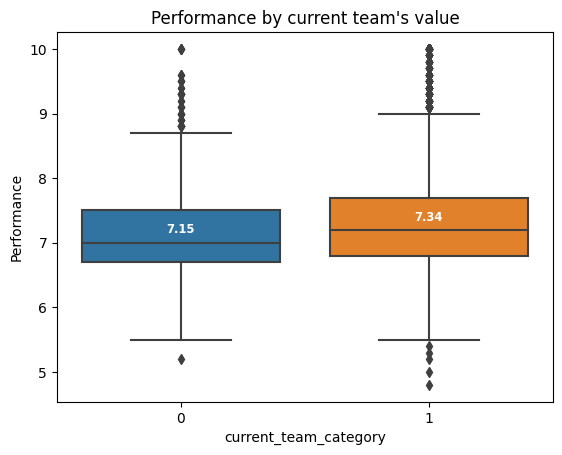

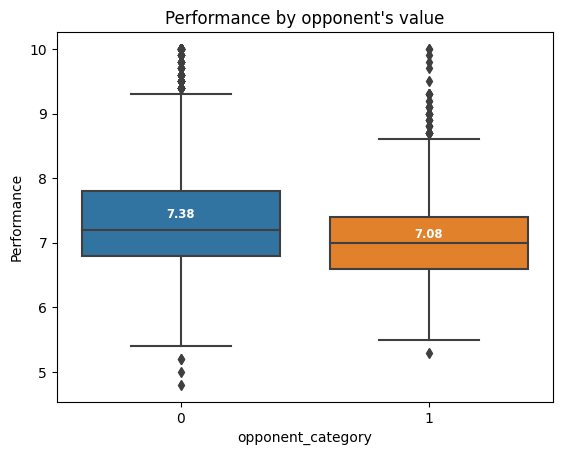

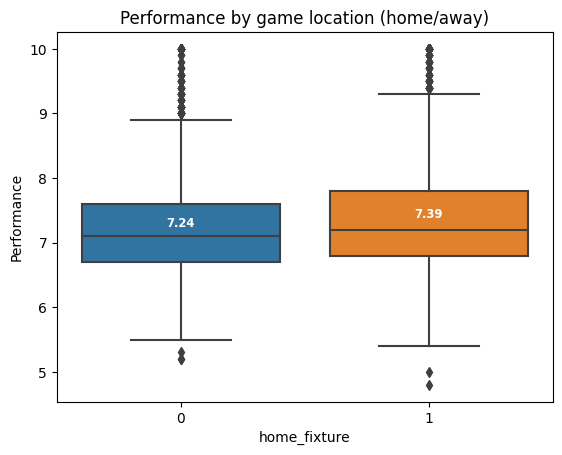

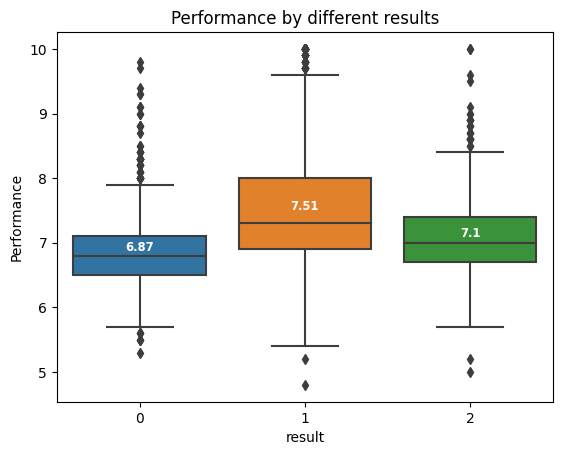

In [11]:
sns.reset_orig()
box_plot = sns.boxplot(x= league_data.after_injury, y=league_data.Performance);
plt.title('Performance when returning from injury or not')
means = league_data.groupby(['after_injury'])['Performance'].mean().round(2)

for xtick in box_plot.get_xticks():
    box_plot.text(xtick, means[xtick],means[xtick], 
            horizontalalignment='center',size='small',color='w',weight='semibold')
plt.savefig('eda/box_performance_injury.png')
plt.show();

box_plot = sns.boxplot(x= league_data.player_position, y=league_data.Performance);
plt.title('Performance by different playing positions')
means = league_data.groupby(['player_position'])['Performance'].mean().round(2)

for xtick in box_plot.get_xticks():
    box_plot.text(xtick, means[xtick],means[xtick], 
            horizontalalignment='center',size='small',color='w',weight='semibold')
plt.savefig('eda/box_performance_position.png')
plt.show();

box_plot = sns.boxplot(x= league_data.current_team_category, y=league_data.Performance);
plt.title("Performance by current team's value")
means = league_data.groupby(['current_team_category'])['Performance'].mean().round(2)

for xtick in box_plot.get_xticks():
    box_plot.text(xtick, means[xtick],means[xtick], 
            horizontalalignment='center',size='small',color='w',weight='semibold')
plt.savefig('eda/box_performance_current_team.png')
plt.show();

box_plot = sns.boxplot(x= league_data.opponent_category, y=league_data.Performance);
plt.title("Performance by opponent's value")
means = league_data.groupby(['opponent_category'])['Performance'].mean().round(2)

for xtick in box_plot.get_xticks():
    box_plot.text(xtick, means[xtick],means[xtick], 
            horizontalalignment='center',size='small',color='w',weight='semibold')
plt.savefig('eda/box_performance_opponent.png')
plt.show();

box_plot = sns.boxplot(x= league_data.home_fixture, y=league_data.Performance);
plt.title('Performance by game location (home/away)')
means = league_data.groupby(['home_fixture'])['Performance'].mean().round(2)

for xtick in box_plot.get_xticks():
    box_plot.text(xtick, means[xtick],means[xtick], 
            horizontalalignment='center',size='small',color='w',weight='semibold')
plt.savefig('eda/box_performance_home.png')
plt.show();

box_plot = sns.boxplot(x= league_data.result, y=league_data.Performance);
plt.title('Performance by different results')
means = league_data.groupby(['result'])['Performance'].mean().round(2)

for xtick in box_plot.get_xticks():
    box_plot.text(xtick, means[xtick],means[xtick], 
            horizontalalignment='center',size='small',color='w',weight='semibold')
plt.savefig('eda/box_performance_result.png')
plt.show();

### Messi's Performance VS Real Madrid, Benzema VS Barcelona

/home/egkiastas/anaconda3/envs/thesis/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/egkiastas/anaconda3/envs/thesis/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


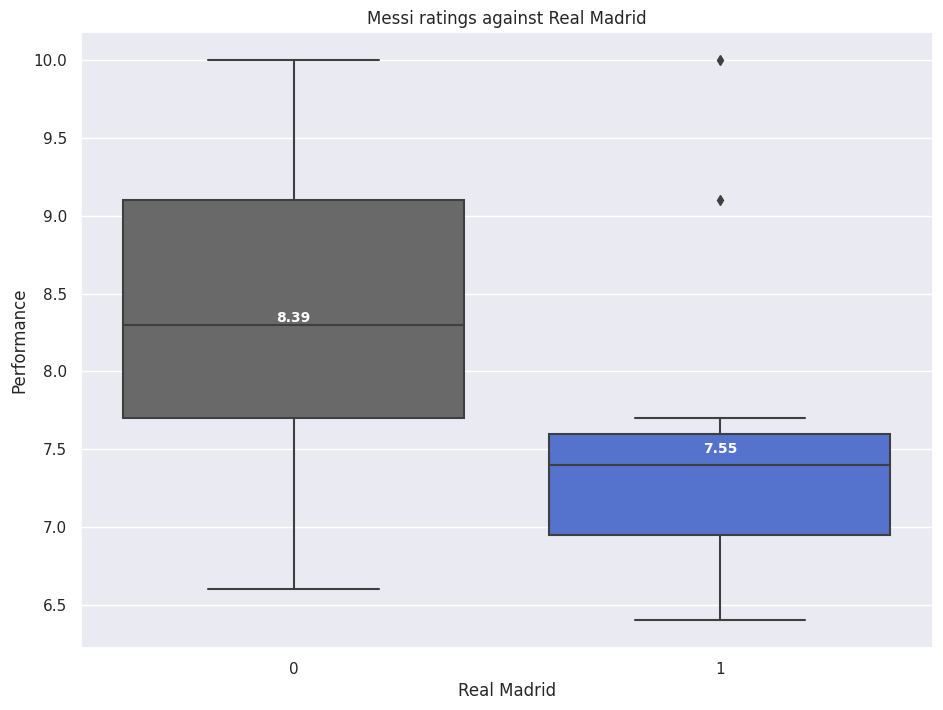

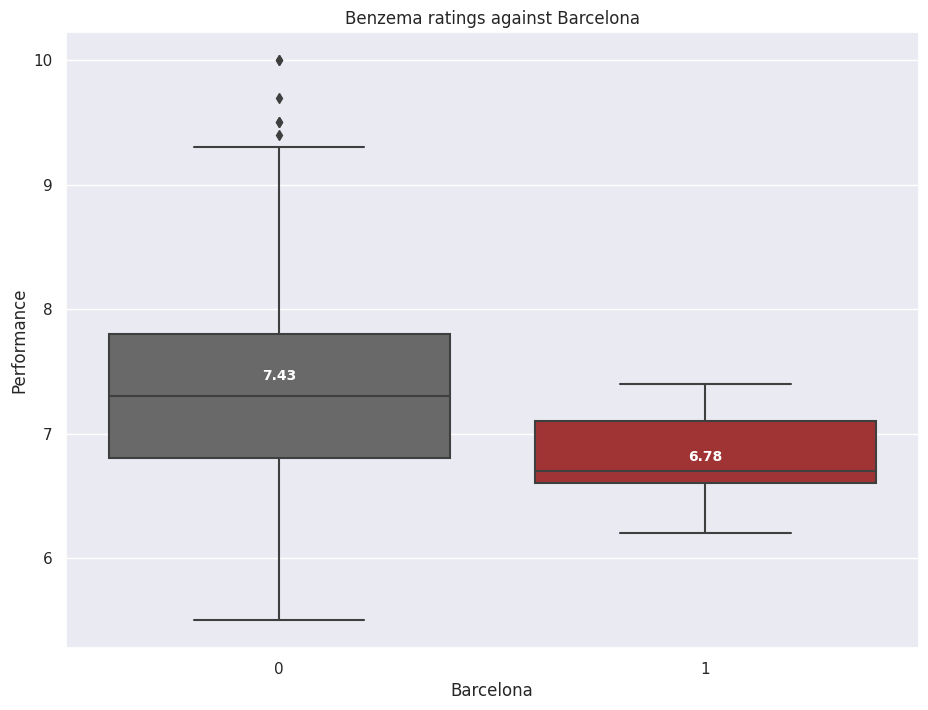

In [46]:
def messi_real(row):
    if row['opponent']=='Real Madrid':
        val = 1
    else:
        val = 0
    return val
messi = league_data[league_data['player_name']=='Messi']
messi['Real Madrid'] = messi.apply(messi_real, axis=1)
# messi

def benzema_barca(row):
    if row['opponent']=='Barcelona':
        val = 1
    else:
        val = 0
    return val
benzema = league_data[league_data['player_name']=='Benzema']
benzema['Barcelona'] = benzema.apply(benzema_barca, axis=1)
# benzema

box_plot = sns.boxplot(x= messi['Real Madrid'], y=messi.Performance, palette=['dimgray','royalblue']);
plt.title("Messi ratings against Real Madrid")
means = messi.groupby(['Real Madrid'])['Performance'].mean().round(2)
vertical_offset = league_data['Performance'].mean() * 0.01 # offset from mean for display

for xtick in box_plot.get_xticks():
    box_plot.text(xtick, means[xtick]-vertical_offset,means[xtick], 
            horizontalalignment='center',size='small',color='w',weight='semibold')
plt.savefig('eda/box_messi_real.png')
plt.show();

box_plot = sns.boxplot(x= benzema.Barcelona, y=benzema.Performance, palette=['dimgray','firebrick']);
plt.title("Benzema ratings against Barcelona")
means = benzema.groupby(['Barcelona'])['Performance'].mean().round(2)

for xtick in box_plot.get_xticks():
    box_plot.text(xtick, means[xtick],means[xtick], 
            horizontalalignment='center',size='small',color='w',weight='semibold')
plt.savefig('eda/box_benzema_barca.png')
plt.show();


### Bonucci's Performance in AC Milan

In [13]:
league_data[((league_data['season']=='17-18') & (league_data['player_name']=='Bonucci'))]['Performance'].mean()
league_data[((league_data['season']!='17-18') & (league_data['player_name']=='Bonucci'))]['Performance'].mean()

7.054285714285713

7.085549132947978

## Check relationships between players of same team

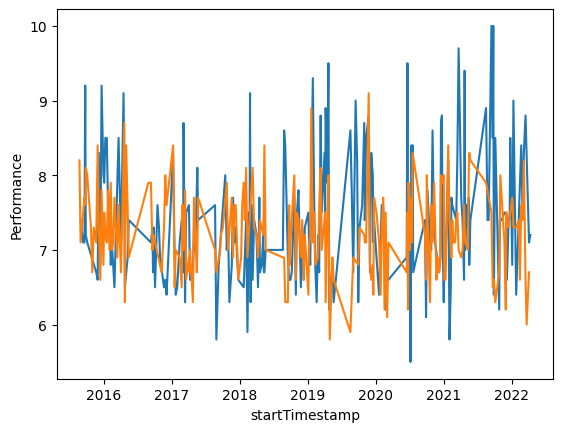

In [14]:
# league_data[league_data['player_name']=='Benzema']['Performance'].plot();
# league_data[league_data['player_name']=='Modric']['Performance'].plot();

sns.lineplot(data=league_data[league_data['player_name']=='Benzema'], x="startTimestamp", y="Performance");
sns.lineplot(data=league_data[league_data['player_name']=='Modric'], x="startTimestamp", y="Performance");


In [49]:
modric = league_data[league_data['player_name']=='Modric']
benzema = league_data[league_data['player_name']=='Benzema']

all_matches = pd.merge(modric, benzema, on='matchid', how = 'left')
all_matches = all_matches[['startTimestamp_x', 'Performance_x', 'Performance_y']]
# all_matches

common_matches = all_matches[all_matches['Performance_y'].notnull()]
common_matches['Performance_x'].mean()
non_common_matches = all_matches[all_matches['Performance_y'].isnull()]
non_common_matches['Performance_x'].mean()

7.250276243093924

7.096

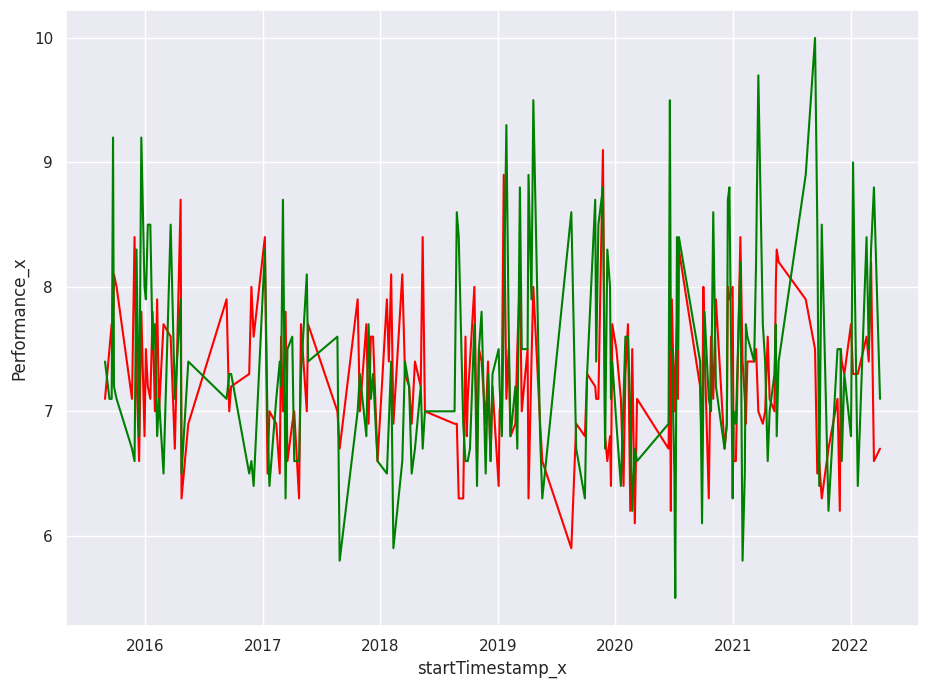

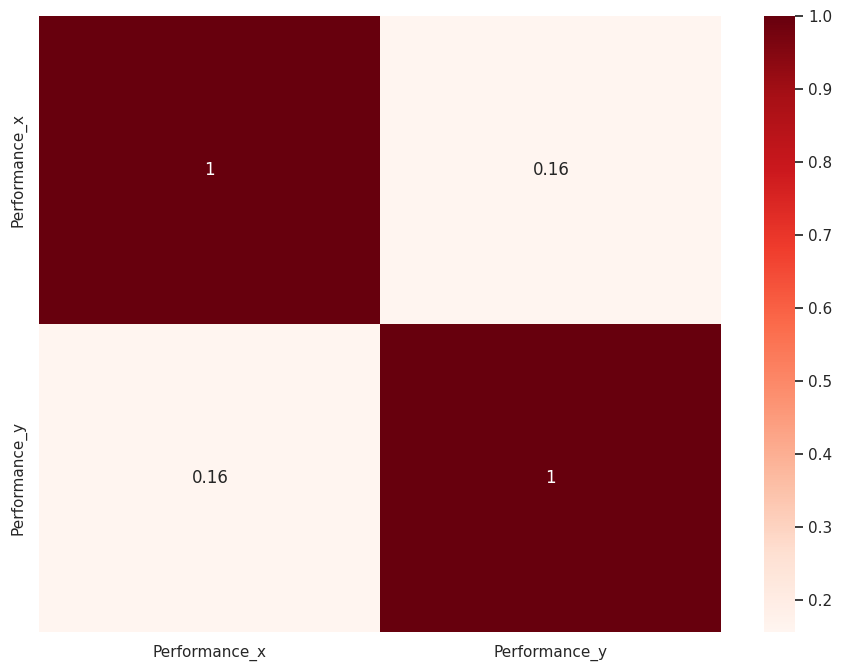

In [44]:
# common_matches.plot()
sns.set(rc={'figure.figsize':(11,8)})
sns.lineplot(data=common_matches, x="startTimestamp_x", y="Performance_x", color='red');
sns.lineplot(data=common_matches, x="startTimestamp_x", y="Performance_y", color='green');
sns.set
plt.show();
sns.heatmap(common_matches[['Performance_x','Performance_y']].corr(), annot=True, cmap = 'Reds');
plt.show();

In [ ]:
def benzema_barca(row):
    if row['opponent']=='Barcelona':
        val = 1
    else:
        val = 0
    return val
benzema = league_data[league_data['player_name']=='Benzema']
benzema['Barcelona'] = benzema.apply(benzema_barca, axis=1)
# benzema

box_plot = sns.boxplot(x= benzema.Barcelona, y=benzema.Performance, palette=['dimgray','firebrick']);
plt.title("Benzema ratings against Barcelona")
means = benzema.groupby(['Barcelona'])['Performance'].mean().round(2)

for xtick in box_plot.get_xticks():
    box_plot.text(xtick, means[xtick],means[xtick], 
            horizontalalignment='center',size='small',color='w',weight='semibold')
plt.savefig('eda/box_benzema_barca.png')
plt.show();
